In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
df_train = pd.read_csv("train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')


In [6]:
df_test = pd.read_csv("test_data.txt", sep=':::', names=[ 'Title', 'Description'], engine='python')
df_test

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
27765,Famous Nathan (2014),"A Coney Island-inspired, densely-layered visu..."
27766,Choron Ki Baaraat (1980),Anju lives a wealthy lifestyle with her widow...
27767,"""Power Plants"" (2003)",Power Plants takes us into the world of some ...
27768,Oh dolci baci e languide carezze (1970),A bourgeois family man falls in love with an ...


In [7]:
df_train.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
df_test.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [9]:
df_train.shape

(25578, 3)

In [ ]:
df_test.shape

(54200, 2)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25578 entries, 1 to 25578
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        25578 non-null  object
 1   Genre        25578 non-null  object
 2   Description  25578 non-null  object
dtypes: object(3)
memory usage: 799.3+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27769 entries, 1 to 27769
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        27769 non-null  object
 1   Description  27769 non-null  object
dtypes: object(2)
memory usage: 650.8+ KB


In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

In [14]:
df_train['Genre'].value_counts()

Genre
 drama           6393
 documentary     6168
 comedy          3487
 short           2442
 horror          1030
 thriller         774
 action           605
 western          488
 reality-tv       428
 family           383
 adventure        381
 music            352
 romance          313
 sci-fi           302
 adult            293
 animation        224
 crime            219
 sport            201
 talk-show        187
 fantasy          162
 mystery          153
 biography        124
 musical          116
 history          110
 game-show         91
 news              87
 war               65
Name: count, dtype: int64

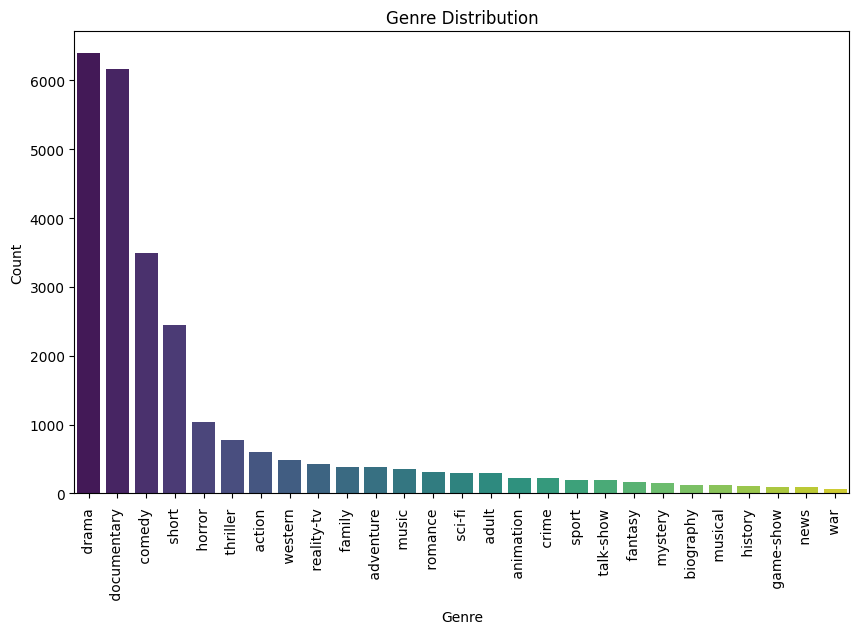

In [15]:
# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df_train,palette='viridis',order=df_train['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [16]:
df_train['num_char_D']= df_train['Description'].apply(len)
df_test['num_char_D']= df_test['Description'].apply(len)

In [17]:
df_train['num_char_T']= df_train['Title'].apply(len)
df_test['num_char_T']= df_test['Title'].apply(len)

In [18]:
#  number of words
df_train['num_words_D']= df_train['Description'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_words_D']= df_test['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df_train['num_char_T']= df_train['Title'].apply(lambda x:len(nltk.word_tokenize(x)))
df_test['num_char_T']= df_test['Title'].apply(lambda x : len(nltk.word_tokenize(x)))

In [20]:
df_train.head()

,Title,Genre,Description,num_char_D,num_char_T,num_words_D
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,8,105
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,4,34
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,8,129
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,6,216
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,5,115


In [21]:
df_test.head()

,Title,Description,num_char_D,num_char_T,num_words_D
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",510,6,108
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",674,7,137
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,590,7,105
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",681,6,137
5,Er nu zhai (1955),Before he was known internationally as a mart...,814,6,169


In [22]:
df_train['num_sen_D']=df_train['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))
df_test['num_sen_D']=df_test['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

def transform_Description_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df_train['transformed_Des']=df_train['Description'].apply(transform_Description_spacy)
df_test['transformed_Des']=df_test['Description'].apply(transform_Description_spacy)



In [31]:

import re

# Load spacy english language model
nlp=spacy.load('en_core_web_sm')

# define the preprocess_text function

def preprocess_text(Description):
  Description=Description.lower()
  Description=re.sub('[^a-zA-Z]',' ',Description)


  #  remove url
  Description=re.sub(r'http\S+', '', Description)
  #  remove special char and num
  Description=re.sub('[^a-zA-Z]',' ',Description)
  #  remove extra space
  Description=re.sub(' +',' ',Description)

   # Lemmatize using spaCy
  doc = nlp(Description)
  lemmatized_words = [token.lemma_ for token in doc]

    # Join the lemmatized words back into a string
  preprocessed_text = ' '.join(lemmatized_words)

  return preprocessed_text

# Apply the preprocess_text function to the 'Description' column
df_train['Cleaned_Des'] = df_train['Description'].apply(preprocess_text)
df_test['Cleaned_Des'] = df_test['Description'].apply(preprocess_text)


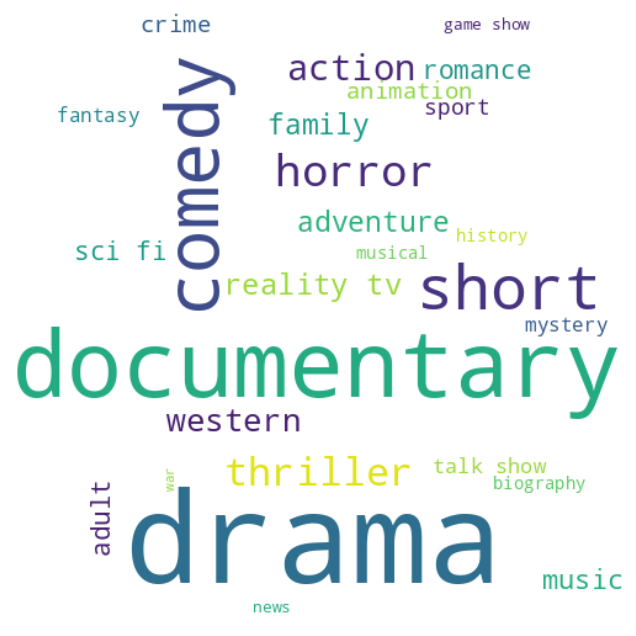

In [24]:
genre_text= ' '.join(df_train['Genre'])
wc=WordCloud(width=500,height=500,background_color='white',max_words=100).generate(genre_text)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [29]:
x=tfidf.fit_transform(df_train['transformed_Des']).toarray()


In [30]:
tfv=TfidfVectorizer()

In [32]:
#  Fit and transform the training data
X_train = tfv.fit_transform(df_train['Description'])

# Transform the test data
X_test = tfv.transform(df_test['Description'])

In [33]:
# Split the data into training and validation sets
X = X_train
y = df_train['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4454652071931196
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       117
       adult        0.00      0.00      0.00        57
   adventure        0.00      0.00      0.00        71
   animation        0.00      0.00      0.00        40
   biography        0.00      0.00      0.00        33
      comedy        0.50      0.01      0.03       677
       crime        0.00      0.00      0.00        53
 documentary        0.54      0.90      0.68      1239
       drama        0.38      0.88      0.53      1308
      family        0.00      0.00      0.00        80
     fantasy        0.00      0.00      0.00        42
   game-show        0.00      0.00      0.00        12
     history        0.00      0.00      0.00        19
      horror        0.00      0.00      0.00       182
       music        0.00      0.00      0.00        70
     musical        0.00      0.00      0.00        22
     mystery        0.00